# Microdosimetric analysis of Geant4 CNPTEPC proton simulation data
## Andrei R. Hanu - andrei.hanu@nasa.gov

In [9]:
# Matplotlib - 2D plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Show matplotlib figures inline the notebook
%matplotlib inline

# Pandas - High-performance data analysis
import pandas

# Glob - Unix style pathname pattern expansion
# Used to aggregate folders and files into a single list so they can be iterated over
import glob

# Numpy - For handling of large, multi-dimensional arrays and matrices
import numpy as np

# Color palette library for Python
# How to choose a colour scheme for your data:
# http://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/
import brewer2mpl

In [10]:
##########################################################################################
# Setting rcParams for publication quality graphs
fig_width_pt = 246.0                    # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # Width in inches
fig_height = fig_width*golden_mean      # Height in inches
fig_size =  [fig_width, fig_height]
# fig_size =  [7.3,4.2]
fig_size =  [7.3*1.25,4.2*1.25]
# fig_size =  [7.3*1.5,4.2*1.5]
# fig_size =  [7.3*2,4.2*2]
params = {'backend': 'pdf',
        'axes.labelsize': 10,
        'legend.fontsize': 9,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'xtick.major.size': 6,
        'xtick.major.width': 1,
        'xtick.minor.size': 2.5,
        'xtick.minor.width': 1,
        'ytick.major.size': 6,
        'ytick.major.width': 1,
        'ytick.minor.size': 2.5,
        'ytick.minor.width': 1,
        'font.family': 'sans-serif',
        'font.sans-serif': 'Avant Garde',
        'font.size': 10,
        'text.usetex': True,
        'figure.figsize': fig_size}

# Update rcParams
rcParams.update(params)

In [11]:
# Energy threshold for detection (eV)
Thr_TEPC = 100.
Thr_ACD = 100.

In [12]:
##########################################################################################
# Load the simulation data
DataFrame = []

##########################################################################################
# Data location folder
# Data filename template
DataFolder = '../Results/ACD_7p5mm/Protons/'
DataFilename = 'proton_100000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t*.csv'

##########################################################################################
# Process the simulation data files
# Column 0 - Energy deposited in the TEPC sensitive volume [eV]
# Column 1 - Track length of particles that entirely traverse the TEPC [mm]
# Column 2 - Energy deposited in the plastic scintillator [eV]
for dataFile in glob.glob(DataFolder + DataFilename):  
    print 'Importing data file: ' + dataFile
    df = pandas.read_csv(dataFile, header=-1, skiprows=6, usecols=[0,1,2])
    DataFrame.append(df) 
    
# Merge the DataFrames from each file
Data = pandas.concat(DataFrame).values

# Print the number of total events
print '\nTotal number of events: \t\t', Data[:,0].size
print 'Number of coincidence events: \t\t', Data[np.logical_and((Data[:,2] > Thr_ACD),(Data[:,0] > Thr_TEPC)),0].size
print 'Number of anti-coincidence events: \t', Data[np.logical_and((Data[:,2] <= Thr_ACD),(Data[:,0] > Thr_TEPC)),0].size
print 'Number of sub-threshold events: \t', Data[np.logical_and((Data[:,2] <= Thr_ACD),(Data[:,0] <= Thr_TEPC)),0].size

Importing data file: ../Results/ACD_7p5mm/Protons/proton_100000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t0.csv
Importing data file: ../Results/ACD_7p5mm/Protons/proton_100000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t1.csv
Importing data file: ../Results/ACD_7p5mm/Protons/proton_100000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t2.csv
Importing data file: ../Results/ACD_7p5mm/Protons/proton_100000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t3.csv
Importing data file: ../Results/ACD_7p5mm/Protons/proton_100000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t4.csv
Importing data file: ../Results/ACD_7p5mm/Protons/proton_100000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t5.csv
Importing data file: ../Results/ACD_7p5mm/Protons/proton_100000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t6.csv
Importing data file: ../Results/ACD_7p5mm/Protons/proton_100000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t7.csv

Total number of events: 		6615064
Number of coincidence events: 		6490445
Number of anti-coincidence events: 	7373
Number of sub-threshold events: 	274


In [13]:
##########################################################################################
# Logarithmic bin generation

# Mean Chord Length
xchord = 2.0*2/3       # 2 um Tissue Size 

# Logarithmic scale parameters
ymin = 0.1
ymax = 1000.0
B = 60
N = np.log10(ymax/ymin)
  
# Logarithmic bin generation
i = np.arange(B*N)
y2 = ymin*10**(i/B)
y2low = y2*10**(-0.5/B)
y2up = y2*10**(0.5/B)

In [14]:
##########################################################################################
# Redistribution of data in logarithmic scale

# Convert from energy deposited to linear energy (keV/um) 
# Note energy deposited is in units of eV
y = Data[Data[:,0] > Thr_TEPC,0]/xchord/1000;
y_COINC = Data[np.logical_and((Data[:,2] > Thr_ACD),(Data[:,0] > Thr_TEPC)),0]/xchord/1000;
y_ACOINC = Data[np.logical_and((Data[:,2] <= Thr_ACD),(Data[:,0] > Thr_TEPC)),0]/xchord/1000;

# Use Numpy to bin the data into the new logarithmic bins
# This is much faster than looping through the data
Ny, bins = np.histogram(y, bins=np.insert(y2up, y2up[0],y2low[0]))
Ny_COINC, bins = np.histogram(y_COINC, bins=np.insert(y2up, y2up[0],y2low[0]))
Ny_ACOINC, bins = np.histogram(y_ACOINC, bins=np.insert(y2up, y2up[0],y2low[0]))

# Create Y-Axis (yNy)
yNy = Ny*y2
yNy_COINC = Ny_COINC*y2
yNy_ACOINC = Ny_ACOINC*y2
ydy = (yNy/np.sum(yNy))*B/np.log(10)
ydy_COINC = (yNy_COINC/np.sum(yNy))*B/np.log(10)
ydy_ACOINC = (yNy_ACOINC/np.sum(yNy))*B/np.log(10)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:4480: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new[slobj] = arr[slobj]
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:4482: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new[slobj] = values
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:4486: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new[slobj] = arr[slobj2]


Plot saved to: ../Results/ACD_7p5mm/Protons/proton_100000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t_ydy.pdf


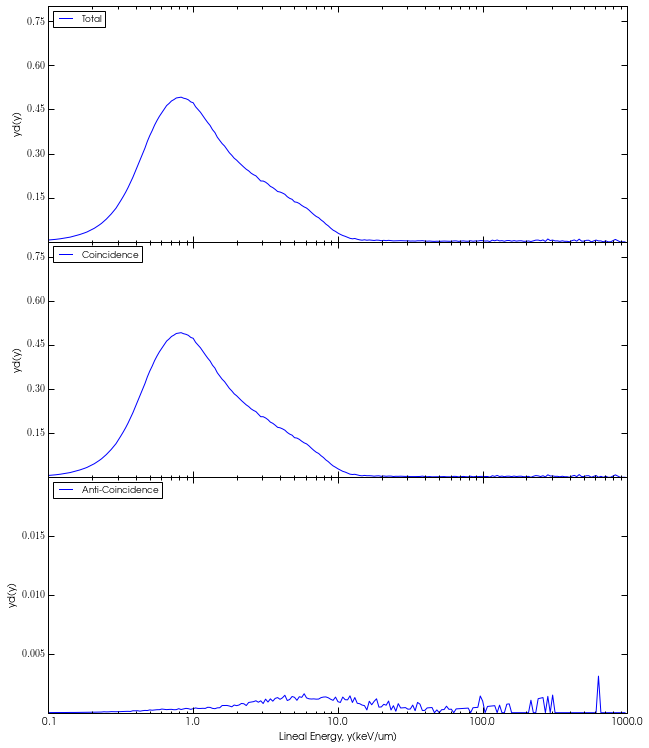

In [19]:
##########################################################################################
# Plot the y vs. ydy spectrum data
fig_ydy, (ax_ydy,ax_ydy_coinc,ax_ydy_acoinc) = plt.subplots(3, sharex=True,figsize=(fig_size[0],fig_size[1]*2))

ax_ydy.semilogx(y2, ydy, linewidth=1.0, label="Total")
ax_ydy_coinc.semilogx(y2, ydy_COINC, linewidth=1.0, label="Coincidence")
ax_ydy_acoinc.semilogx(y2, ydy_ACOINC, linewidth=1.0, label="Anti-Coincidence")

# Figure Properties
ax_ydy_acoinc.set_xlabel('Lineal Energy, y(keV/um)')
ax_ydy.set_ylabel('yd(y)')   
ax_ydy_coinc.set_ylabel('yd(y)')  
ax_ydy_acoinc.set_ylabel('yd(y)')  
ax_ydy.set_xlim(ymin, ymax)
ax_ydy_coinc.set_xlim(ymin, ymax)
ax_ydy_acoinc.set_xlim(ymin, ymax)
ax_ydy.set_ylim(0, 0.8)
ax_ydy.set_yticks([0.15,0.3,0.45,0.60,0.75])
ax_ydy_coinc.set_ylim(0, 0.8)
ax_ydy_coinc.set_yticks([0.15,0.3,0.45,0.60,0.75])
ax_ydy_acoinc.set_ylim(0, 0.02)
ax_ydy_acoinc.set_yticks([0.005,0.010,0.015])

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax_ydy.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_ydy.yaxis.set_major_formatter(ScalarFormatter())

ax_ydy.legend(loc='upper left')
ax_ydy_coinc.legend(loc='upper left')
ax_ydy_acoinc.legend(loc='upper left')

# Fine-tune figure 
# Make subplots close to each other
fig_ydy.tight_layout()
fig_ydy.subplots_adjust(hspace=0)

# Save the figure 
file_ydy = DataFilename.split('.')[0][:-1]+'_ydy.pdf'
plt.savefig(DataFolder + file_ydy, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_ydy)

# Show the figure
plt.show(fig_ydy)

In [16]:
##########################################################################################
# Calculate the errors in each Ny bin
Ny_err, bins_Ny_err = np.histogram(np.sqrt(Ny)/Ny*100, bins=50, range=[0,5], normed=False, weights=None, density=None)

Plot saved to: ../Results/ACD_7p5mm/Protons/proton_100000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t_error.pdf


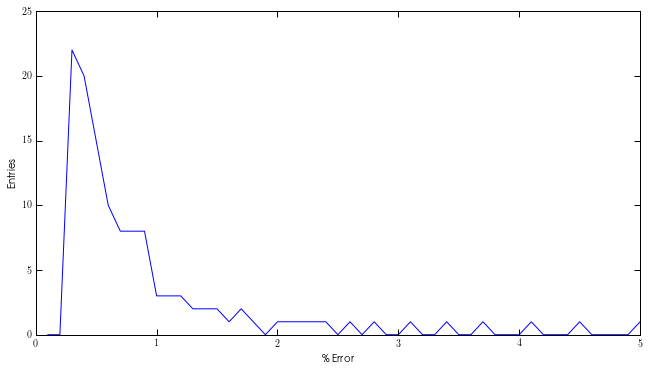

In [17]:
##########################################################################################
# Plot the errors
fig_Ny_err, ax_Ny_err = plt.subplots(1,1)

plt.plot(bins_Ny_err[1:], Ny_err, linewidth=1.0)

# Figure Properties
ax_Ny_err.set_xlabel('\% Error')
ax_Ny_err.set_ylabel('Entries')   
ax_Ny_err.set_xlim(0, 5)

# Tight Layout
plt.tight_layout()

# Save the figure 
file_Ny_err = DataFilename.split('.')[0][:-1]+'_error.pdf'
plt.savefig(DataFolder + file_Ny_err, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_Ny_err)

# Show the figure
plt.show(fig_Ny_err)

100.002 764.949 1504960.0 6490445
118.372 20384200.0 95856500.0 6490445
Plot saved to: ../Results/ACD_7p5mm/Protons/proton_100000keV_Nr_100000000_ISO_nt_G4CNPTEPC_t_eDep.pdf


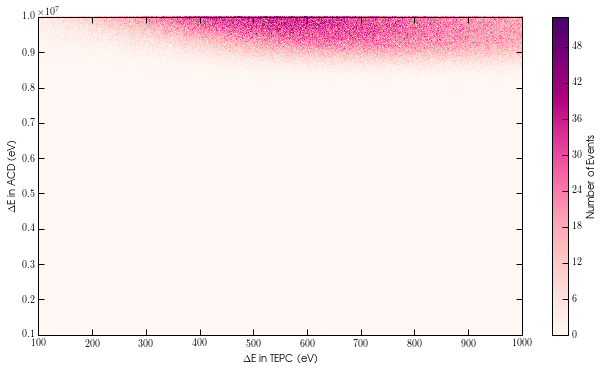

In [18]:
eDep_TEPC = Data[np.logical_and((Data[:,2] > Thr_ACD),(Data[:,0] > Thr_TEPC)),0]
eDep_ACD = Data[np.logical_and((Data[:,2] > Thr_ACD),(Data[:,0] > Thr_TEPC)),2]
print np.min(eDep_TEPC),np.median(eDep_TEPC),np.max(eDep_TEPC), eDep_TEPC.size
print np.min(eDep_ACD),np.median(eDep_ACD),np.max(eDep_ACD), eDep_ACD.size

##########################################################################################
# Plot of energy deposited in TEPC 

# Fix the number of bins
numBins = 5E2

# Create histogram
fig_eDep, ax_eDep = plt.subplots(1,1)

# Draw histogram
H = ax_eDep.hist2d(eDep_TEPC,eDep_ACD, numBins, range=np.array([(1E2, 1E3), (1E6, 1E7)]), 
                   cmap=brewer2mpl.get_map('RdPu', 'sequential', 9, reverse=False).mpl_colormap)

# Draw the color bar
cbar = fig_eDep.colorbar(H[3], ax=ax_eDep, spacing='uniform', label='Number of Events')
cbar.solids.set_edgecolor("face")

# Figure Properties
ax_eDep.set_xlabel(r'$\Delta$E in TEPC (eV)')
ax_eDep.set_ylabel(r'$\Delta$E in ACD (eV)')   
ax_eDep.set_xlim(np.min(H[1]), np.max(H[1]))
ax_eDep.set_ylim(np.min(H[2]), np.max(H[2]))

from matplotlib.ticker import ScalarFormatter
ax_eDep.xaxis.set_major_formatter(ScalarFormatter())
ax_eDep.yaxis.set_major_formatter(ScalarFormatter())

# Tight Layout
plt.tight_layout()

# Save the figure 
file_eDep = DataFilename.split('.')[0][:-1]+'_eDep.pdf'
plt.savefig(DataFolder + file_eDep, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_eDep)

# Show the figure
plt.show(fig_eDep)